In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
data = boston.data
feature_names = boston.feature_names

In [7]:
X = pd.DataFrame(data, columns = feature_names)
y = boston.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [16]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

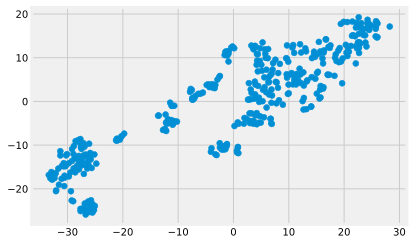

In [17]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

### Задание 2

In [18]:
from sklearn.cluster import KMeans

In [20]:
Kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [21]:
labels_train = Kmeans.fit_predict(X_train_scaled)

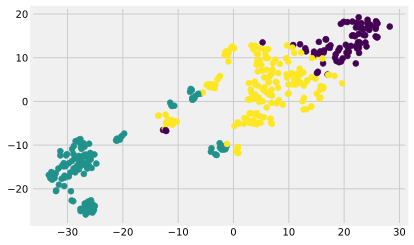

In [22]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.show()

### Задание 3

In [23]:
labels_test = Kmeans.predict(X_test_scaled)

In [25]:
print('Среднее значение price для Кластера 0: {}'.format(y_test[labels_test == 0].mean()))
print('Среднее значение price для Кластера 1: {}'.format(y_test[labels_test == 1].mean()))
print('Среднее значение price для Кластера 2: {}'.format(y_test[labels_test == 2].mean()))

Среднее значение price для Кластера 0: 28.678260869565218
Среднее значение price для Кластера 1: 16.034146341463416
Среднее значение price для Кластера 2: 22.261904761904763


In [26]:
print('Среднее значение CRIM для Кластера 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Среднее значение CRIM для Кластера 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Среднее значение CRIM для Кластера 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Среднее значение CRIM для Кластера 0: 0.06811521739130436
Среднее значение CRIM для Кластера 1: 12.071473414634145
Среднее значение CRIM для Кластера 2: 0.27501126984126983
